# Introduction to Lines using TensorFlow

https://www.tensorflow.org/

http://playground.tensorflow.org

# Part 1

## A Simple Example of a line graph using TensorFlow & TensorBoard

In [1]:
import tensorflow as tf

In [2]:
# Adding and multipling constants, just to get a feel for what TensorFlow is doing
a = tf.constant(5, name="input_a")
b = tf.constant(3, name="input_b")
c = tf.multiply(a,b, name="mul_c")
d = tf.add(a,b, name="add_d")
e = tf.add(c,d, name="add_e")

# Create a session, run the session, write out the graph to view output using TensorBoardb
sess = tf.Session()
output = sess.run(e)
writer = tf.summary.FileWriter('./new_graph', graph=sess.graph)
result = int(sess.run(e))
writer.close()
sess.close()
print("(5 x 3) + (5 + 3) = {}".format(result))


(5 x 3) + (5 + 3) = 23


## Open up TensorBoard

Take a look at the resulting graph

> tensorboard --logdir=new_graph

Notice anything so far?

# Part 2

## A Simple Example of a ML algorithm detecting the best fit using gradiant descent

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
# some helper functions

# a scatter plot
def plot_points(X, Y):
    admitted = X[np.argwhere(Y==1)]
    rejected = X[np.argwhere(Y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'red', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'blue', edgecolor = 'k')

# display a plot
def display(m, b, color='b--'):
    plt.xlim(-0.05,1.05)
    plt.ylim(-0.05,1.05)
    x = np.arange(-10, 10, 0.1)
    plt.plot(x, m*x+b, color)

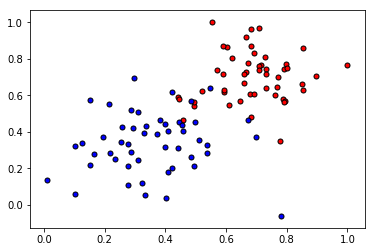

In [5]:
# read in the data and plot it
data = pd.read_csv('data.csv', header=None)
X = np.array(data[[0,1]])
y = np.array(data[2])
plot_points(X,y)
plt.show()

In [6]:
# Sigmoid activation function
# https://en.wikipedia.org/wiki/Sigmoid_function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Output (prediction) formula
# slope of the line (more or less) y = mx + b
def output_formula(features, weights, bias):
    return sigmoid(np.dot(features, weights) + bias)

# Error function
# figure out how inaccurate the current weights are
def error_formula(y, output):
    return - y*np.log(output) - (1 - y) * np.log(1 - output)

# Update weights after each iteration (later)
def update_weights(x, y, weights, bias, learnrate):
    output = output_formula(x, weights, bias)
    d_error = -(y - output)
    weights -= learnrate * d_error * x
    bias -= learnrate * d_error
    return weights, bias

# Training function
# iterate the gradient descent algorithm through all the data
def train(features, targets, epochs, learnrate, graph_lines=False):
    
    errors = []
    n_records, n_features = features.shape
    last_loss = None
    weights = np.random.normal(scale=1 / n_features**.5, size=n_features)
    bias = 0
    for e in range(epochs):
        del_w = np.zeros(weights.shape)
        for x, y in zip(features, targets):
            output = output_formula(x, weights, bias)
            error = error_formula(y, output)
            weights, bias = update_weights(x, y, weights, bias, learnrate)
        
        # Printing out the log-loss error on the training set
        out = output_formula(features, weights, bias)
        loss = np.mean(error_formula(targets, out))
        errors.append(loss)
        if e % (epochs / 10) == 0:
            print("\n========== Epoch", e,"==========")
            print("Train loss: ", loss)
            last_loss = loss
            predictions = out > 0.5
            accuracy = np.mean(predictions == targets)
            print("Accuracy: ", accuracy)
        if graph_lines and e % (epochs / 100) == 0:
            display(-weights[0]/weights[1], -bias/weights[1])
            

    # Plotting the solution boundary
    plt.title("solution boundary")
    display(-weights[0]/weights[1], -bias/weights[1], 'black')

    # Plotting the data
    plot_points(features, targets)
    plt.show()

    # Plotting the error
    plt.title("Error Plot")
    plt.xlabel('Number of epochs')
    plt.ylabel('Error')
    plt.plot(errors)
    plt.show()


========== Epoch 0 ==========
Train loss:  0.6507576664919863
Accuracy:  0.58

========== Epoch 100 ==========
Train loss:  0.31813331545666196
Accuracy:  0.93

========== Epoch 200 ==========
Train loss:  0.24325245167608553
Accuracy:  0.93

========== Epoch 300 ==========
Train loss:  0.21080432802525872
Accuracy:  0.94

========== Epoch 400 ==========
Train loss:  0.19262223094194572
Accuracy:  0.94

========== Epoch 500 ==========
Train loss:  0.18098421607318113
Accuracy:  0.93

========== Epoch 600 ==========
Train loss:  0.17290267629593017
Accuracy:  0.92

========== Epoch 700 ==========
Train loss:  0.16697289288051476
Accuracy:  0.91

========== Epoch 800 ==========
Train loss:  0.16244530686331315
Accuracy:  0.91

========== Epoch 900 ==========
Train loss:  0.15888265562934012
Accuracy:  0.91


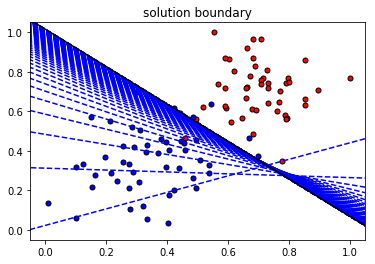

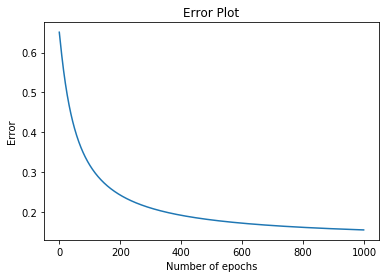

In [10]:
# Time to train the algorithm
np.random.seed()
epochs = 1000
learnrate = 0.01
train(X, y, epochs, learnrate, True)